In [1]:
import numpy as np
from glob import glob
import cv2, os, random
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint

In [11]:
path='dogs-vs-cats/train'

In [12]:
dog_path = os.path.join(path, 'dog.5*')
len(glob(dog_path))

1111

In [4]:
seed = 2020
np.random.seed(seed)
tf.random.set_seed(seed)

In [5]:
BATCH_SIZE = 32
NUM_CLASSES = 10
EPOCHS = 50
DATA_AUGMENTATION = True
NUM_PREDICTIONS = 20
SAVE_DIR = os.path.join(os.getcwd(), 'model')
MODEL_NAME = 'keras_cifar10_trained_model.h5'

In [9]:
(x_train, y_train0), (x_test, y_test0) = keras.datasets.cifar10.load_data()

In [19]:
classes = ['dog', 'cat']

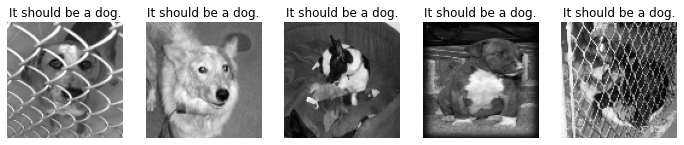

In [20]:
plt.figure(figsize=(12,8))    
for i in range(5):
    plt.subplot(1, 5, i+1)
    img = image.array_to_img(random.choice(dogs))
    plt.imshow(img, cmap=plt.get_cmap('gray'))

    plt.axis('off')
    plt.title('It should be a {}.'.format(classes[0]))        
plt.show()

In [21]:
ROW, COL = 96, 96

dogs, cats = [], []
y_dogs, y_cats = [], []

In [22]:
def load_dogs():
    print('Loading all dog images\n')
    dog_path = os.path.join(path, 'dog*')
    for dog_img in glob(dog_path):
        dog = cv2.imread(dog_img)
        dog = cv2.cvtColor(dog, cv2.COLOR_BGR2GRAY)
        dog = cv2.resize(dog, (ROW, COL))
        dog = image.img_to_array(dog)
        dogs.append(dog)
    print('All dog images loaded')

In [23]:
def load_cats():
    print('Loading all cat images\n')
    cat_path = os.path.join(path, 'cat*')
    for cat_img in glob(cat_path):
        cat = cv2.imread(cat_img)
        cat = cv2.cvtColor(cat, cv2.COLOR_BGR2GRAY)
        cat = cv2.resize(cat, (ROW, COL))
        cat = image.img_to_array(cat)
        cats.append(cat)
    print('All cat images loaded')

In [24]:
load_dogs()

Loading all dog images

All dog images loaded


In [25]:
load_cats()

Loading all cat images

All cat images loaded


In [26]:
y_dogs = [1 for item in enumerate(dogs)]
y_cats = [0 for item in enumerate(cats)]

In [27]:
dogs = np.asarray(dogs).astype('float32')
cats = np.asarray(cats).astype('float32')
y_dogs = np.asarray(y_dogs).astype('int32')
y_cats = np.asarray(y_cats).astype('int32')

In [28]:
dogs /= 255
cats /= 255

In [29]:
IMG_CHANNEL = 1
BATCH_SIZE = 128
N_EPOCH = 10
VERBOSE = 2
VALIDAION_SPLIT = .2
OPTIM = Adam()
N_CLASSES = len(classes)

In [31]:
X = np.concatenate((dogs,cats), axis=0)
y = np.concatenate((y_dogs, y_cats), axis=0)

In [32]:
y = tf.keras.utils.to_categorical(y, N_CLASSES)

In [39]:
model = Sequential([
    Conv2D(32, (3,3), padding='same', input_shape=(ROW, COL, IMG_CHANNEL), activation='relu'),
    Conv2D(32, (3,3), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(.25),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(.25),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(.5),
    Dense(N_CLASSES, activation='softmax')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 96, 96, 32)        320       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 96, 96, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 48, 48, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 48, 48, 64)        18496     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 48, 48, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 24, 24, 64)       

In [46]:
model.compile(loss='categorical_crossentropy', optimizer=OPTIM, metrics=['accuracy'])

In [50]:
modelpath = "model/dogs_vs_cats-cnn-{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', 
                               verbose=1, save_best_only=True)

In [52]:
model.fit(X, y, batch_size=32, epochs=10, validation_split=0.2,
          callbacks=[checkpointer])

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
19968/20000 [============================>.] - ETA: 0s - loss: 0.6772 - accuracy: 0.6246
Epoch 00001: val_loss improved from inf to 0.93966, saving model to model/dogs_vs_cats-cnn-01-0.9397.hdf5
20000/20000 [==============================] - 297s 15ms/sample - loss: 0.6772 - accuracy: 0.6248 - val_loss: 0.9397 - val_accuracy: 0.0000e+00
Epoch 2/10
19968/20000 [============================>.] - ETA: 0s - loss: 0.6622 - accuracy: 0.6248
Epoch 00002: val_loss did not improve from 0.93966
20000/20000 [==============================] - 296s 15ms/sample - loss: 0.6621 - accuracy: 0.6250 - val_loss: 0.9629 - val_accuracy: 0.0000e+00
Epoch 3/10
19968/20000 [============================>.] - ETA: 0s - loss: 0.6618 - accuracy: 0.6249
Epoch 00003: val_loss did not improve from 0.93966
20000/20000 [==============================] - 315s 16ms/sample - loss: 0.6618 - accuracy: 0.6250 - val_loss: 0.9700 - val_accuracy: 0.0000e+00
Epoch 4/10


In [49]:
>

25000/25000 - 70s - loss: 0.6931 - accuracy: 0.5011
MODEL ACCURACY: 0.50108


In [54]:
from tensorflow.keras.models import load_model
del model


In [55]:
model = load_model('model/dogs_vs_cats-cnn-01-0.9397.hdf5')

In [56]:
model.evaluate(X, y)

25000/25000 [==============================] - 72s 3ms/sample - loss: 0.7176 - accuracy: 0.5000


[0.717601686706543, 0.5]

# 50%입니다